In [10]:
import pandas as pd
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
train_labels = pd.read_csv("D:/Python projects/Machine Learning/Machine_learning Project 1/ship_dataset/train.csv")
train_labels['category'] = train_labels['category'] - 1

In [50]:
train_labels.head()

,image,category
0,2823080.jpg,0
1,2870024.jpg,0
2,2662125.jpg,1
3,2900420.jpg,2
4,2804883.jpg,1


In [70]:
train_labels.category.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [21]:
train_labels.dtypes

image       object
category     int64
dtype: object

In [26]:
path = r"D:\Python projects\Machine Learning\Machine_learning Project 1\ship_dataset\images"
X = []
y = []
img_shape = 128

for i in train_labels.iterrows():
    img_path = os.path.join(path, i[1]['image'])
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_shape, img_shape))
    img = tf.keras.preprocessing.image.img_to_array(img)
    X.append(img)
    y.append((i[1])['category'])
X = np.asarray(X)
y = np.asarray(y)

In [34]:
X.shape

(6252, 128, 128, 3)

In [35]:
X = X/255

In [49]:
y[:5]

array([0, 0, 1, 2, 1])

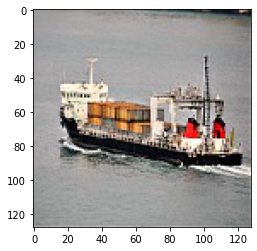

In [67]:
plt.imshow(X[1])

In [68]:
y[1]

0

In [42]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [45]:
X_train.shape

(5001, 128, 128, 3)

In [46]:
y_train[:5]

array([2, 0, 2, 4, 0])

In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.layers import Dense, Activation, Flatten

In [107]:
cnn_model = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(img_shape,img_shape,3)),
    layers.MaxPool2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    
    
    layers.Flatten(),
    layers.Dense(500, activation='relu'),
  
    layers.Dense(5, activation='softmax'),
])

In [109]:
cnn_model.compile(optimizer='rmsprop',
                 loss="sparse_categorical_crossentropy",
                 metrics=['accuracy'])


In [110]:
cnn_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 14, 14, 64)     

In [111]:
cnn_model.fit(X_train,y_train,epochs=10)

Epoch 1/10
157/157 [==============================] - 78s 490ms/step - loss: 1.4653 - accuracy: 0.3803
Epoch 2/10
157/157 [==============================] - 77s 492ms/step - loss: 1.0739 - accuracy: 0.5655
Epoch 3/10
157/157 [==============================] - 77s 490ms/step - loss: 0.8566 - accuracy: 0.6551
Epoch 4/10
157/157 [==============================] - 78s 500ms/step - loss: 0.6918 - accuracy: 0.7347
Epoch 5/10
157/157 [==============================] - 81s 518ms/step - loss: 0.5721 - accuracy: 0.7830
Epoch 6/10
157/157 [==============================] - 81s 513ms/step - loss: 0.4665 - accuracy: 0.8208
Epoch 7/10
157/157 [==============================] - 79s 504ms/step - loss: 0.3754 - accuracy: 0.8566
Epoch 8/10
157/157 [==============================] - 77s 493ms/step - loss: 0.2853 - accuracy: 0.8958
Epoch 9/10
157/157 [==============================] - 82s 520ms/step - loss: 0.2215 - accuracy: 0.9176
Epoch 10/10
157/157 [==============================] - 100s 638ms/step - 

In [113]:
cnn_model.evaluate(X_test,y_test)

40/40 [==============================] - 5s 131ms/step - loss: 0.8390 - accuracy: 0.7794


[0.8390329480171204, 0.7793765068054199]

In [114]:
y_pred = cnn_model.predict(X_test)
y_pred

array([[1.2693031e-01, 8.4433031e-01, 7.4269919e-06, 2.8654447e-02,
        7.7626763e-05],
       [2.0291749e-03, 9.9781102e-01, 7.2606440e-06, 1.9750439e-06,
        1.5055190e-04],
       [8.4792519e-01, 1.4783809e-07, 1.7036058e-06, 1.0053952e-07,
        1.5207289e-01],
       ...,
       [4.4096823e-06, 4.9321326e-08, 9.9997711e-01, 5.9651017e-09,
        1.8421662e-05],
       [3.7788158e-08, 9.9987829e-01, 1.3425195e-08, 1.2143400e-04,
        1.8699689e-07],
       [5.9912020e-07, 2.8940617e-06, 1.9874248e-12, 9.9999619e-01,
        4.0829920e-07]], dtype=float32)

In [115]:
y_predicted =  [np.argmax(i) for i in y_pred]

In [116]:
y_predicted[:5]

[1, 1, 0, 2, 1]

In [117]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)

Text(33.0, 0.5, 'Truth')

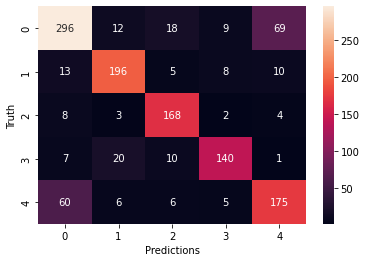

In [118]:
import seaborn as sn

sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predictions")
plt.ylabel("Truth")

In [122]:
from sklearn.metrics import classification_report

In [123]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       404
           1       0.83      0.84      0.84       232
           2       0.81      0.91      0.86       185
           3       0.85      0.79      0.82       178
           4       0.68      0.69      0.68       252

    accuracy                           0.78      1251
   macro avg       0.79      0.79      0.79      1251
weighted avg       0.78      0.78      0.78      1251

